# 1. Package install

> ## 1) PyKoSpacing & hanspell설치

In [ ]:
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

In [ ]:
!pip install git+https://github.com/ssut/py-hanspell.git

> ## 2) khaiii 다운로드

- khaiii_tokenized에 적용

In [ ]:
!git clone https://github.com/kakao/khaiii.git

In [ ]:
!pip install cmake

In [ ]:
!mkdir build

In [ ]:
!cd build && cmake /content/khaiii

In [ ]:
!cd /content/build/ && make all

In [ ]:
!cd /content/build/ && make resource

In [ ]:
!cd /content/build && make install

In [ ]:
!cd /content/build && make package_python

In [ ]:
!pip install /content/build/package_python

> ## 3) import 

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from khaiii import KhaiiiApi
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from hanspell import spell_checker
from google.colab import files
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import regularizers
import gensim
from pykospacing import spacing
from keras import backend as K

# 2. Preprocessing

> ## 1) hanspell

In [ ]:
DF = pd.read_excel('dataset_emotion3_ver2.xlsx', engine='openpyxl')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60857 entries, 0 to 60856
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  60857 non-null  int64 
 1   sentence    60857 non-null  object
 2   emotion     60857 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.4+ MB


In [ ]:
total_data = pd.DataFrame()

total_data['sentence'] = DF['sentence']
total_data['emotion'] = DF['emotion']

In [ ]:
total_data['emotion'].value_counts()

0    21149
2    19856
1    19852
Name: emotion, dtype: int64

In [ ]:
total_data.tail()

,sentence,emotion
60852,학생은 감상문도 그렇고 표현이 굉장이 거침 없네요.,1
60853,주인공이 하는 짓이 워낙 바보 같아서 이해를 못하겠다. 였죠? 굉장히 인상적이어서 ...,1
60854,하지만 역시 이해가 안가요.,1
60855,하하. 그게 솔직한 감상이라면 솔직한 감상이란 거겠죠. 성적에 욕심이 있는 타입의 ...,1
60856,안가고 뭐 하세요?,1


- 앞 뒤 공백 제거

In [ ]:
remove_empty = []

for s in total_data['sentence']:
    remove_empty.append(s.strip())

In [ ]:
total_data['sentence'] = pd.DataFrame(remove_empty)

total_data.head()

,sentence,emotion
0,언니 동생으로 부르는게 맞는 일인가요..??,0
1,그냥 내 느낌일뿐겠지?,0
2,아직너무초기라서 그런거죠?,0
3,유치원버스 사고 낫다던데,0
4,근데 원래이런거맞나요,0


In [ ]:
# 정규표현식 사용하여 필요한 특수문자 외에 다른 특수문제들 제거
total_data['sentence'] = total_data['sentence'].str.replace('[^가-힣0-9A-Za-zㄱ-ㅎㅏ-ㅣ♡♥!?. ]', '')

In [ ]:
total_data['sentence'].head(10)

0     언니 동생으로 부르는게 맞는 일인가요..??
1                 그냥 내 느낌일뿐겠지?
2               아직너무초기라서 그런거죠?
3                유치원버스 사고 낫다던데
4                  근데 원래이런거맞나요
5                  남자친구가 떠날까봐요
6         이거 했는데 허리가 아플수도 있나요?
7                 내가불안해서꾸는걸까..
8              일주일도 안 남았당...ㅠㅠ
9    약은 최대한 안먹으려고 하는데좋은 음시있나요?
Name: sentence, dtype: object

In [ ]:
# 너무 많은 문장을 한 번에 처리하면 오류 발생해서 나눠서 처리
df1 = total_data['sentence'][:10000]
df2 = total_data['sentence'][10000:20000]
df3 = total_data['sentence'][30000:40000]
df4 = total_data['sentence'][40000:50000]
df5 = total_data['sentence'][50000:60000]
df6 = total_data['sentence'][60000:]
df7 = total_data['sentence'][20000:30000]

In [ ]:
%%time
# 가끔 오류가 날 수 있음
# 런타임 초기화 할 필요 없이 다시 시작하면 오류없이 됨

hanspell_result7 = []

for s in df7:
    print(s)
    hanspell = spell_checker.check(s) # hanspell 활용하여 띄어쓰기 및 맞춤법 검사
    hanspell_result7.append(hanspell.checked)

In [ ]:
%%time

hanspell_result = []

for s in df1:
    print(s)
    hanspell = spell_checker.check(s) # hanspell 활용하여 띄어쓰기 및 맞춤법 검사
    hanspell_result.append(hanspell.checked)

In [ ]:
%%time

hanspell_result2 = []
for s in df2:
    print(s)
    hanspell = spell_checker.check(s) # hanspell 활용하여 띄어쓰기 및 맞춤법 검사
    hanspell_result2.append(hanspell.checked)

In [ ]:
%%time

hanspell_result3 = []
for s in df3: 
    print(s)
    hanspell = spell_checker.check(s) # hanspell 활용하여 띄어쓰기 및 맞춤법 검사
    hanspell_result3.append(hanspell.checked)

In [ ]:
%%time


hanspell_result4 = []

for s in df4:
    print(s)
    hanspell = spell_checker.check(s) # hanspell 활용하여 띄어쓰기 및 맞춤법 검사
    hanspell_result4.append(hanspell.checked)

In [ ]:
%%time

hanspell_result5 = []
for s in df5:
    print(s)
    hanspell = spell_checker.check(s) # hanspell 활용하여 띄어쓰기 및 맞춤법 검사
    hanspell_result5.append(hanspell.checked)

In [ ]:
%%time

hanspell_result6 = []
for s in df6:
    print(s)
    hanspell = spell_checker.check(s) # hanspell 활용하여 띄어쓰기 및 맞춤법 검사
    hanspell_result6.append(hanspell.checked)

In [ ]:
preprocessing = pd.DataFrame()

preprocessing['1'] = hanspell_result
preprocessing['2'] = hanspell_result2
preprocessing['3'] = hanspell_result7
preprocessing['4'] = hanspell_result3
preprocessing['5'] = hanspell_result4
preprocessing['6'] = hanspell_result5

In [ ]:
lst = [''] * 10000

In [ ]:
for i in range(len(hanspell_result6)):
    lst[i] = hanspell_result6[i]

In [ ]:
lst

In [ ]:
preprocessing['7'] = lst

- Hanspell 완료

In [ ]:
preprocessing

In [ ]:
sentence1 = pd.DataFrame() 
sentence2 = pd.DataFrame() 
sentence3 = pd.DataFrame() 
sentence4 = pd.DataFrame() 
sentence5 = pd.DataFrame() 
sentence6 = pd.DataFrame() 
sentence7 = pd.DataFrame() 

In [ ]:
sentence1['1'] = preprocessing['1'] 
sentence2['1'] = preprocessing['2']
sentence3['1'] = preprocessing['3']
sentence4['1'] = preprocessing['4']
sentence5['1'] = preprocessing['5']
sentence6['1'] = preprocessing['6']
sentence7['1'] = preprocessing['7']

In [ ]:
preprocessed = pd.concat([sentence1, sentence2,sentence3, sentence4, sentence5, sentence6, sentence7], ignore_index=True)

In [ ]:
preprocessed.info()

In [ ]:
total_data['preprocessed'] = preprocessed

In [ ]:
total_data

In [ ]:
total_data.to_excel('preprocessing_emotion3.xlsx')

> ## 2) PyKoSpacing

    (1) 데이터 불러오기 & 확인




In [ ]:
# 시간이 오래 걸리는 전처리 과정을 파일로 저장 후 새로 불러옴

df = pd.read_excel('/content/preprocessing_emotion3.xlsx')

df.head()

,Unnamed: 0,sentence,emotion,preprocessed
0,0,언니 동생으로 부르는게 맞는 일인가요..??,0,언니 동생으로 부르는 게 맞는 일인가요..??
1,1,그냥 내 느낌일뿐겠지?,0,그냥 내 느낌일 뿐이겠지?
2,2,아직너무초기라서 그런거죠?,0,아직 너무 초기라서 그런 거죠?
3,3,유치원버스 사고 낫다던데,0,유치원 버스 사고 낫다던데
4,4,근데 원래이런거맞나요,0,근데 원래 이런 거 맞나요


In [ ]:
after_hanspell = pd.DataFrame()

In [ ]:
after_hanspell['hanspell'] = df['preprocessed']
after_hanspell['emotion'] = df['emotion']

In [ ]:
after_hanspell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60853 entries, 0 to 60852
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   hanspell  60853 non-null  object
 1   emotion   60853 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 951.0+ KB


    (2) PyKoSpacing 진행

    - DataFrame 형태도 진행된다.
      - Hanspell은 Series로 진행 됐음

In [ ]:
# Hanspell 진행 후에도 띄어쓰기가 안 되어 있는 문장만 뽑아 
# PyKoSpacing(띄어쓰기 패키지) 진행한다. 
%%time


spacing_sentence = []

for s in after_hanspell['hanspell']:
    if ' ' not in s:                    # 띄어쓰기가 없다면
        print(s)                        # 해당 문장을 뽑아서
        kospacing_sentence = spacing(s) # pykospacing으로 띄어쓰기 해라
        spacing_sentence.append(kospacing_sentence)
    else:
        spacing_sentence.append(s)      # 띄어쓰기가 되어 있다면, 그대로 spacing_sentence에 추가해라

In [ ]:
print(len(spacing_sentence))

60853


In [ ]:
print(type(spacing_sentence))

<class 'list'>


In [ ]:
after_hanspell['Sentence'] = spacing_sentence # 최종 문장 Sentence로 저장

In [ ]:
after_hanspell.to_excel('preprocessing_3emotion_pykospacing.xlsx')

# 3. Modeling

> ## 1) Pre_modeling

In [ ]:
Data = pd.read_excel('/content/preprocessing_3emotion_pykospacing.xlsx')

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60853 entries, 0 to 60852
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  60853 non-null  int64 
 1   hanspell    60853 non-null  object
 2   emotion     60853 non-null  int64 
 3   Sentence    60853 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.9+ MB


In [ ]:
total_data = pd.DataFrame()

total_data['sentence'] = Data['Sentence']
total_data['emotion'] = Data['emotion']

In [ ]:
total_data.nunique() # 중복 데이터 확인

sentence    60529
emotion         3
dtype: int64

In [ ]:
total_data.drop_duplicates(subset=['sentence'], inplace=True) # 중복 데이터 제거

len(total_data)

60529

In [ ]:
print(total_data.isnull().values.any()) # null 값 확인

False


In [ ]:
total_data['emotion'].value_counts()

0    21104
1    19719
2    19706
Name: emotion, dtype: int64

In [ ]:
api = KhaiiiApi()

def khaiii_tokenized(s):
  result = []
  for word in api.analyze(s):
    for morph in word.morphs:
      result.append(morph.lex)
  return result

In [ ]:
train_data, validtest = train_test_split(total_data, test_size=0.2,
                                         random_state=2045)

print(len(train_data))
print(len(validtest))

48423
12106


In [ ]:
valid_data, test_data = train_test_split(validtest, test_size=0.3,
                                         random_state=2045)

print(len(valid_data))
print(len(test_data))

8474
3632


In [ ]:
train_data['tokenized'] = train_data['sentence'].apply(khaiii_tokenized) # khaiii 패키지 활용하여 형태소 분석
valid_data['tokenized'] = valid_data['sentence'].apply(khaiii_tokenized)
test_data['tokenized'] = test_data['sentence'].apply(khaiii_tokenized)

In [ ]:
X_train = train_data['tokenized'].values
y_train = train_data['emotion'].values
X_valid = valid_data['tokenized'].values
y_valid = valid_data['emotion'].values
X_test= test_data['tokenized'].values
y_test = test_data['emotion'].values

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
# 한 번 이하로 등장하는 단어 수 및 비율 확인

threshold = 2
total_cnt = len(tokenizer.word_index) 
rare_cnt = 0

for key, value in tokenizer.word_counts.items():
    if value < threshold:
        rare_cnt = rare_cnt + 1


print('단어 집합 크기 :',total_cnt)
print(f'등장 빈도가 {threshold - 1}번 이하인 단어의 수: {rare_cnt}')
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)

단어 집합 크기 : 27707
등장 빈도가 1번 이하인 단어의 수: 14390
단어 집합에서 희귀 단어의 비율: 51.936333778467535


In [ ]:
vocab_size = total_cnt # - rare_cnt 하면 등장 빈도 1번 이하인 단어 제외

print(vocab_size)

27707


In [ ]:
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_valid = tokenizer.texts_to_sequences(X_valid)
X_test = tokenizer.texts_to_sequences(X_test)

최대 길이 : 132
평균 길이 : 15.58612642752411


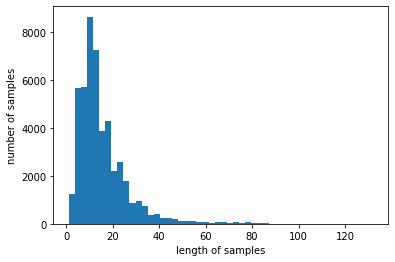

In [ ]:
# 문장 최대 길이 및 평균 길이 확인

print('최대 길이 :',max(len(l) for l in X_train))
print('평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
# padding 길이 조정을 위해 어느 길이로 했을 때 어느 정도 비율의 문장이 포함되는지 확인
def sentence_len_rate(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print(f'길이 {max_len} 이하 문장 비율: {(cnt / len(nested_list))*100:.3f}')

In [ ]:
max_len = 50
sentence_len_rate(max_len, X_train) 

In [ ]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_valid = pad_sequences(X_valid, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [ ]:
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

In [ ]:
y_train.shape

(48423, 3)

> ## 2) Word2Vec

In [ ]:
tokenized_data = []

In [ ]:
for t in train_data['tokenized']:
  tokenized_data.append(t)

In [ ]:
len(tokenized_data)

48423

In [ ]:
# 학습 데이터로 Word2Vec 생성
word2vec = gensim.models.Word2Vec(sentences=tokenized_data,
                               size=200,
                               window=3,
                               min_count=1,
                               workers=4,
                               sg=1)

In [ ]:
word2vec.wv.vectors.shape

(27830, 200)

In [ ]:
vocab_size = len(tokenizer.index_word) + 1
embedding_dim = 200

embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, idx in tokenizer.word_index.items():
  embedding_vector = word2vec[word] if word in word2vec else None
  if embedding_vector is not None:
    embedding_matrix[idx] = embedding_vector

embedding_matrix.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


(27708, 200)

In [ ]:
embedding_matrix.shape

(27708, 200)

> ## 3) modeling

In [ ]:
K.clear_session()

In [ ]:
%%time

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Bidirectional(LSTM(256, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

CPU times: user 1.51 s, sys: 57.9 ms, total: 1.57 s
Wall time: 1.53 s


In [ ]:
# 위에서 생성한 Word2Vec 사용

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable=False

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 200)         5541600   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 512)         935936    
_________________________________________________________________
dropout (Dropout)            (None, None, 512)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 128)         328192    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 128)         0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
mc = ModelCheckpoint('best_model_BiLSTM_4.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, callbacks=[es, mc],
                    batch_size=200, validation_data=(X_valid, y_valid))

Epoch 1/100
243/243 [==============================] - 37s 127ms/step - loss: 0.7973 - acc: 0.6265 - val_loss: 0.6531 - val_acc: 0.7255

Epoch 00001: val_acc improved from -inf to 0.72551, saving model to best_model_BiLSTM_4.h5
Epoch 2/100
243/243 [==============================] - 29s 118ms/step - loss: 0.6566 - acc: 0.7226 - val_loss: 0.6293 - val_acc: 0.7279

Epoch 00002: val_acc improved from 0.72551 to 0.72787, saving model to best_model_BiLSTM_4.h5
Epoch 3/100
243/243 [==============================] - 29s 118ms/step - loss: 0.6140 - acc: 0.7417 - val_loss: 0.6667 - val_acc: 0.7201

Epoch 00003: val_acc did not improve from 0.72787
Epoch 4/100
243/243 [==============================] - 29s 118ms/step - loss: 0.6034 - acc: 0.7464 - val_loss: 0.6040 - val_acc: 0.7413

Epoch 00004: val_acc improved from 0.72787 to 0.74133, saving model to best_model_BiLSTM_4.h5
Epoch 5/100
243/243 [==============================] - 29s 118ms/step - loss: 0.5740 - acc: 0.7606 - val_loss: 0.5855 - val

In [ ]:
loaded_model = load_model('best_model_BiLSTM_4.h5')
print("테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

114/114 [==============================] - 5s 32ms/step - loss: 0.5793 - acc: 0.7684
테스트 정확도: 0.7684


In [ ]:
files.download('best_model_BiLSTM_4.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

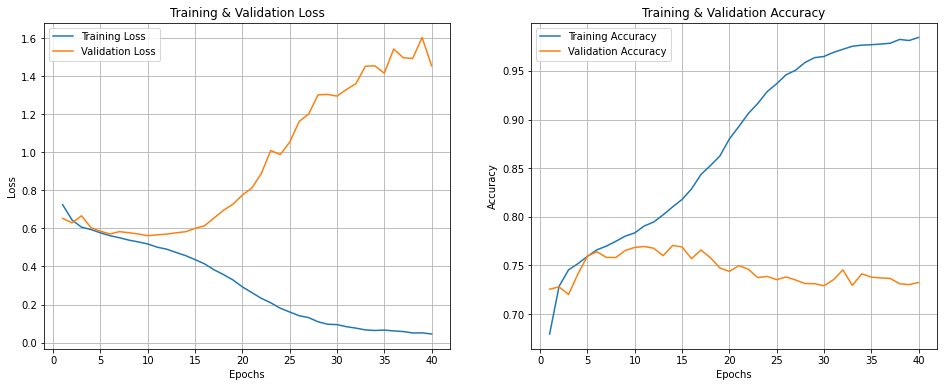

In [ ]:
epochs = range(1, len(history.history['loss']) + 1)

plt.figure(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

In [ ]:
y_pred = loaded_model.predict(X_test)
y_pred_final = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

    cnt = [긍정, 부정, 중립]

In [ ]:
cnt = [0, 0, 0]

for i in range(len(y_test)):
  if y_pred_final[i] != y_true[i]: # 잘못 예측했을 경우
    print(f'pred: {y_pred_final[i]} / answer: {y_true[i]}') # 예측값과 실제값을 출력
    n = y_pred_final[i]
    cnt[n] += 1

print('\n', cnt) # 감정별로 몇 개 틀렸는지 출력
print(len(y_test)) # test 데이터 총 개수

pred: 2 / answer: 0
pred: 1 / answer: 2
pred: 2 / answer: 1
pred: 0 / answer: 2
pred: 1 / answer: 0
pred: 0 / answer: 2
pred: 1 / answer: 0
pred: 2 / answer: 0
pred: 1 / answer: 0
pred: 2 / answer: 0
pred: 1 / answer: 0
pred: 0 / answer: 1
pred: 1 / answer: 0
pred: 0 / answer: 2
pred: 1 / answer: 0
pred: 1 / answer: 0
pred: 1 / answer: 2
pred: 1 / answer: 0
pred: 0 / answer: 1
pred: 2 / answer: 1
pred: 1 / answer: 2
pred: 0 / answer: 2
pred: 1 / answer: 0
pred: 1 / answer: 0
pred: 2 / answer: 1
pred: 1 / answer: 0
pred: 1 / answer: 0
pred: 2 / answer: 0
pred: 0 / answer: 1
pred: 1 / answer: 0
pred: 2 / answer: 0
pred: 2 / answer: 0
pred: 2 / answer: 1
pred: 2 / answer: 1
pred: 1 / answer: 0
pred: 1 / answer: 2
pred: 1 / answer: 0
pred: 1 / answer: 0
pred: 2 / answer: 1
pred: 0 / answer: 1
pred: 0 / answer: 1
pred: 0 / answer: 1
pred: 1 / answer: 2
pred: 1 / answer: 0
pred: 0 / answer: 1
pred: 2 / answer: 1
pred: 0 / answer: 2
pred: 0 / answer: 2
pred: 0 / answer: 2
pred: 0 / answer: 1


# demo

PC버전 카카오톡에서 대화 내보내기 기능을 사용하여 저장한 txt 파일을 활용한 시연

In [ ]:
with open('KakaoTalk_for_Demo.txt', mode='rt', encoding='utf-8') as f: # 카카오톡 대화 불러오기
  lines = f.readlines()

In [ ]:
del lines[0:3] # txt 파일 상단 필요없는 부분 삭제

In [ ]:
def get_date(lines): # 날짜 정보 가져오기(최상단 날짜만 가져옴)
  date = ''
  length = 0
  date_start = False
  for i in range(len(lines)):
    if '---------------' in lines[i]:
      if date_start == False:
        date_start = True
        date = lines[i]
      else:
        length = i - 1
        break
  return date, length

In [ ]:
def get_users(lines, length): # 대화 상대 목록 가져오기
  users = []
  cnt = 0
  for line in lines:
    cnt += 1
    u = ''
    for c in line:
      u += c
      if c == ']':
        users.append(u)
        break
    if cnt == length:
      break
  return users

In [ ]:
def get_info(lines): 
  date, length = get_date(lines)
  del lines[0]
  
  users = get_users(lines, length)
  user_set = set(users)
  user_list = list(user_set) # set으로 변경했다가 다시 list로 만들면 중복 제거 가능

  for i in range(len(user_list)):
    user_list[i] = user_list[i].replace('[', '')
    user_list[i] = user_list[i].replace(']', '')

  return date, length, user_list

In [ ]:
date, length, user_list = get_info(lines)

print(date) # 대화 날짜
print(length) # 대화 총 길이
print(user_list) # 대화 상대

--------------- 2021년 4월 2일 금요일 ---------------

18
['김용현님', '김혜빈님', '희진', '최문선님']


In [ ]:
# 사용자별로 대화를 나누어 저장
def divide_chat(user_name, length, lines):
  chat = []
  for i in range(length):
    if user_name in lines[i]:
      lines[i] = lines[i].replace(user_name, '')
      lines[i] = lines[i].replace('[]', '')
      lines[i] = lines[i].replace('\n', '')
      chat.append(lines[i])
  return chat

In [ ]:
divided_chat = []

for user in user_list:
  divided_chat.append(divide_chat(user, length, lines))

divided_chat

[[' [오전 11:45] 흠... 알겠습니다..! 저도 찾아볼게요'],
 [' [오전 11:52] 사진',
  ' [오전 11:52] 아 혹시 그래서 안 열린 걸까요!?',
  ' [오전 11:52] 나중에 다시 해 볼게요!',
  ' [오전 11:52] 수고하셨습니다~'],
 [' [오전 11:43] 사진',
  ' [오전 11:43] 제가 혜빈님이 올리신 노트 수정하고 깃에 다시 올리려고 하니까 혜빈님 저장소로 올라가네요 ,,',
  ' [오전 11:44] 혜빈님 저장소밖에 안보여요ㅠㅠ',
  ' [오전 11:45] 이 부분은 제가 다음에 어떻게 하면 좋을지 한번 찾아볼게요!',
  ' [오전 11:45] 혹시 해결법 찾으시면 알려주세요',
  ' [오전 11:46] 점심 맛있게 드세요! 고생하셨습니다',
  ' [오후 12:56] https://dschloe.github.io/settings/colab_drive_github_settings/'],
 [' [오전 11:43] 갑자기 끝났네요... 오전 수업 고생하셨습니다',
  ' [오전 11:44] 저기 저장소에서 못고르는건가요??',
  ' [오전 11:46] 넵 확인해보겠습니다 점심 맛있게드세요!',
  ' [오후 1:15] 넵 감사합니다!']]

In [ ]:
# 사용자별 대화를 데이터프레임에 보낸 시간과 함께 저장
import pandas as pd

kakao_dict = dict()

for idx, user in enumerate(iterable=user_list, start=0):
  chat = divided_chat[idx]
  index_time = user + '_time'
  time_list = []
  text_list = []

  for c in chat:
    time, text = c.split('] ')
    time_list.append(time)
    text_list.append(text)
  
  kakao_dict[index_time] = time_list
  kakao_dict[user] = text_list

kakao_df = pd.DataFrame.from_dict(kakao_dict, orient='index')
kakao_df = kakao_df.transpose()

kakao_df

,김용현님_time,김용현님,김혜빈님_time,김혜빈님,희진_time,희진,최문선님_time,최문선님
0,[오전 11:45,흠... 알겠습니다..! 저도 찾아볼게요,[오전 11:52,사진,[오전 11:43,사진,[오전 11:43,갑자기 끝났네요... 오전 수업 고생하셨습니다
1,None,None,[오전 11:52,아 혹시 그래서 안 열린 걸까요!?,[오전 11:43,제가 혜빈님이 올리신 노트 수정하고 깃에 다시 올리려고 하니까 혜빈님 저장소로 올라...,[오전 11:44,저기 저장소에서 못고르는건가요??
2,None,None,[오전 11:52,나중에 다시 해 볼게요!,[오전 11:44,혜빈님 저장소밖에 안보여요ㅠㅠ,[오전 11:46,넵 확인해보겠습니다 점심 맛있게드세요!
3,None,None,[오전 11:52,수고하셨습니다~,[오전 11:45,이 부분은 제가 다음에 어떻게 하면 좋을지 한번 찾아볼게요!,[오후 1:15,넵 감사합니다!
4,None,None,None,None,[오전 11:45,혹시 해결법 찾으시면 알려주세요,None,None
5,None,None,None,None,[오전 11:46,점심 맛있게 드세요! 고생하셨습니다,None,None
6,None,None,None,None,[오후 12:56,https://dschloe.github.io/settings/colab_drive...,None,None


In [ ]:
# 문장별 감정 예측 코드
def sentiment_predict(sentence):
  original_sentence = sentence
  sentence = sentence.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣A-Za-z♡♥.?! ]', '') # 정규표현식 사용하여 일부 특수문자 제거
  hanspell_sentence = spell_checker.check(sentence) 
  sentence = hanspell_sentence.checked # hanspell 패키지 사용하여 띄어쓰기 및 맞춤법 교정
  sentence = khaiii_tokenized(sentence) # 형태소별로 분리
  encoded = tokenizer.texts_to_sequences([sentence]) # 토크나이징
  pad_sentence = pad_sequences(encoded, maxlen=50) # 패딩

  result = loaded_model.predict(pad_sentence) # 저장한 모델로 예측

  neg_result = f'부정:{result[0][0]:.3f}'
  neu_result = f'중립:{result[0][0]:.3f}'
  pos_result = f'긍정:{result[0][0]:.3f}'

  print(f'{original_sentence}', end=' | ')
  print(f'{neg_result} {neu_result} {pos_result}')

  print('-' * 100)
  

  top1_emotion = np.argmax(result, axis=1)
  return int(top1_emotion)
  

In [ ]:
# 하루 대화의 종합적인 결과 출력을 위한 함수
def daily_report(total_result):
  emotion_list = ['오늘은 기분이 좋지 않은 날이었네요', '오늘은 기분에 큰 변화가 없는 날이었네요', '오늘은 기분이 좋은 날이었네요']
  today_result = [0, 0, 0]
  today_result[0] = total_result.count(0)
  today_result[1] = total_result.count(1)
  today_result[2] = total_result.count(2)

  today_emotion = today_result.index(max(today_result))

  neg = f'부정: {today_result[0]} / {sum(today_result)}'
  neu = f'중립: {today_result[1]} / {sum(today_result)}'
  pos = f'긍정: {today_result[2]} / {sum(today_result)}'

  print(f'{neg}')
  print(f'{neu}')
  print(f'{pos}')
  print('으로 구성 되어 있어요.\n')

  print(f'{emotion_list[today_emotion]}')

In [ ]:
print(f'User List : {user_list}') # 불러온 대화 파일에서 대화를 나눈 사용자명 추출
name = input('Input user name : ') # 결과를 보려고 하는 사용자명 입력
if name not in user_list:
  print('No Result')
else:
  test = kakao_df[name].values # 해당 사용자의 대화 목록
  total_result = []
  print()
  for t in test:
    if not t:
      break
    total_result.append(sentiment_predict(t))

  print('\n\n')
  print('=' * 15, end='')
  print('Daily Report', end='')
  print('=' * 15)
  print(f'{name} 이 오늘 말하신 문장을 종합해보니')
  daily_report(total_result)

User List : ['최문선님', '희진', '김용현님', '김혜빈님']
Input user name : 희진

사진 | 부정:0.172 중립:0.402 긍정:0.426
----------------------------------------------------------------------------------------------------
제가 혜빈님이 올리신 노트 수정하고 깃에 다시 올리려고 하니까 혜빈님 저장소로 올라가네요 ,, | 부정:0.654 중립:0.295 긍정:0.051
----------------------------------------------------------------------------------------------------
혜빈님 저장소밖에 안보여요ㅠㅠ | 부정:0.987 중립:0.004 긍정:0.009
----------------------------------------------------------------------------------------------------
이 부분은 제가 다음에 어떻게 하면 좋을지 한번 찾아볼게요! | 부정:0.002 중립:0.703 긍정:0.294
----------------------------------------------------------------------------------------------------
혹시 해결법 찾으시면 알려주세요 | 부정:0.598 중립:0.209 긍정:0.194
----------------------------------------------------------------------------------------------------
점심 맛있게 드세요! 고생하셨습니다 | 부정:0.000 중립:0.004 긍정:0.996
----------------------------------------------------------------------------------------------------
https://ds

# demo2

한 문장씩 분석

In [ ]:
sentence = '행복하다'
sentiment_predict(sentence) # sentiment_predict 함수는 위의 demo1에서 선언

부정: 0.00813
중립: 0.00536
긍정: 0.98651
